In [1]:
from subprocess import Popen, PIPE
import getpass
username='EZAGAYNAYA'
REALM='BEE.VIMPELCOM.RU'
password = getpass.getpass(prompt='Enter Your Ldap password:\n')
kinit = 'kinit'
kinit_args = [ kinit, '%s@%s' % (username, REALM) ]
kinit = Popen(kinit_args, stdin=PIPE, stdout=PIPE, stderr=PIPE)
kinit.stdin.write(bytearray(password + "\n", "ascii"))
kinit.stdin.flush()
kinit.wait()

Enter Your Ldap password:
 ········


0

In [2]:
from pyspark import SparkConf  # noqa: E402
from pyspark.sql import DataFrame as SparkDataFrame  # noqa: E402
from pyspark.sql import SparkSession  # noqa: E402
from pyspark.sql import functions as F  # noqa: E402
from pyspark.sql.functions import col, when, min, max, sum, mean, count, substring, countDistinct, last_day, concat_ws 
from pyspark.sql.types import StringType, LongType

SPARK_SETTINGS = [
    ('spark.yarn.queue', 'default'),
        ('spark.sql.sources.partitionOverwriteMode', 'dynamic'),
        ('hive.exec.dynamic.partition', 'true'),
        ('hive.exec.dynamic.partition.mode', 'nonstrict'),
        ('spark.default.parallelism', '400'),
        ('spark.driver.memory', '20G'),
        ('spark.driver.memoryOverhead', '2G'),
        ('spark.driver.cores', 4),
        ('spark.driver.maxResultSize', '150G'),
        ('spark.dynamicAllocation.enabled', 'false'),
        ('spark.dynamicAllocation.maxExecutors', 200),
        ('spark.executor.memory', '20G'),
        ('spark.executor.memoryOverhead', '4G'),
        ('spark.executor.cores', 6),
        ('spark.executor.instances', 10),
        ('spark.hadoop.mapreduce.input.fileinputformat.input.dir.recursive', 'true'),
        ('spark.hive.mapred.supports.subdirectories', 'true'),# драйвер (понадобится для чтения из RDBMS)
        ('spark.kryoserializer.buffer', '1000m'),
        ('spark.kryoserializer.buffer.max', '2000m'),
        ('spark.rpc.message.maxSize', 2000),
        ('spark.serializer', 'org.apache.spark.serializer.KryoSerializer'),
        ('spark.sql.execution.arrow.pyspark.enabled', 'true'),
        ('spark.sql.shuffle.partitions', '400'),
        ('spark.driver.extraClassPath', '/lib/oracle/19.8/client64/lib/ojdbc8.jar'), # драйвер (понадобится для чтения из RDBMS)
        ('spark.jars', '/lib/oracle/19.8/client64/lib/ojdbc8.jar'),
        ("spark.sql.hive.convertMetastoreOrc", " false"),
        ('spark.app.name', 'SVFomenkov_testing_pipeline')
]

app_name = 'ZEM_spark_session'

conf = SparkConf().setAppName(app_name).setMaster('yarn').setAll(SPARK_SETTINGS)
spark = SparkSession.builder.config(conf=conf).enableHiveSupport().getOrCreate()
spark.sparkContext.setLogLevel('ERROR')
spark.conf.set("spark.sql.hive.convertMetastoreOrc", " false")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/15 16:00:46 WARN HiveConf: HiveConf of name hive.mapred.supports.subdirectories does not exist
25/07/15 16:00:46 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [3]:
from IPython.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))
display(HTML("<style>div.jp-OutputArea-output pre {white-space: pre;}</style>"))

/tmp/ipykernel_209/3383840084.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### df_external 2

In [4]:
df_external_2 = spark.read.table('b2b_profile.org_kontur_focus_galaxy')

print('num_rows:', df_external_2.count())  
print('num_cols:', len(df_external_2.columns))  
df_external_2.show(10)

num_rows: 328300
num_cols: 47


+------------+---------------+--------------------+---------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------+---------------+-----------+--------------------+-----------+---------+----------+------------+-----------+-----------+----+-------+-----+----------+-----------+----------------+----+--------------------+--------------------+----------+----------+----------------+----------------+------------------+------------------+--------------+-------------+--------+-----------+------------+--------------+-------------------+-------------------+-------+------------+----------+---------------+----------+
|         inn|           ogrn|          legal_name|      kpp|    legal_name_short|     legal_name_full|                 opf|registration_date|       legal_address|region_type|    region_name|region_code|              status|bankrupting|dissolved|dissolving|reorganizing|status_date|      okato|okfs|  okogu|okopf|      okpo|    

#### Pandas

In [102]:
import pandas as pd
import numpy as np
import scipy as sp

import pickle
# import shap

import statsmodels
import statsmodels.api as sm

import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, datasets, linear_model, metrics

import seaborn as sns

import datetime as dt
from datetime import datetime
from datetime import date
import math

# TF-IDF:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

from matplotlib.collections import LineCollection

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [103]:
# df_external_2 = spark.read.table('b2b_profile.org_kontur_focus_galaxy')

# df_external_2_pd.to_pickle('df_external_2_pd.pkl')
df_init = pd.read_pickle('df_external_2_pd.pkl')

print(df_init.shape)
df_init.head(2)

# (6 293 630, 47)

(6293630, 47)


,CLIENT_INN,OGRN,LEGAL_NAME,KPP,LEGAL_NAME_SHORT,LEGAL_NAME_FULL,OPF,REGISTRATION_DATE,LEGAL_ADDRESS,REGION_TYPE,...,MSP_IN_DATE,MSP_OUT_DATE,COUNT_EMPLOYEE,COUNT_EMPLOYEE_DATE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,NET_PROFIT_YEAR,TIME_KEY
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",010001001,"ООО ""ОМНИТЕХ СОЛЮШНС""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОМНИ...",Общества с ограниченной ответственностью,2024-06-06,"385141, Республика Адыгея (Адыгея), м.р-н Тахт...",республика,...,2024-07-10,None,NaN,None,NaN,NaN,NaN,NaN,NaN,2025-04-02
1,0100009649,1240100002482,Региональная Физкультурно-Спортивная Обществен...,010001001,"РФС ОО ""ФЛБ"" РА",РЕГИОНАЛЬНАЯ ФИЗКУЛЬТУРНО-СПОРТИВНАЯ ОБЩЕСТВЕН...,Общественные организации,2024-08-30,"385019, Республика Адыгея (Адыгея), г.о. Город...",республика,...,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,2025-04-02


In [104]:
print( df_init[df_init['OPF'].isin(['Общества с ограниченной ответственностью',
                        'Открытые акционерные общества',
                        'Публичные акционерные общества',
                        'Непубличные акционерные общества'])].shape)

df_init[df_init['OPF'].isin(['Общества с ограниченной ответственностью',
                        'Открытые акционерные общества',
                        'Публичные акционерные общества',
                        'Непубличные акционерные общества'])]['REVENUE'].isnull().sum()

(2447302, 47)


378224

In [105]:
# df.info()
df_null_count = pd.DataFrame(df_init.isnull().sum())
df_null_count.rename(columns = {0: 'count_null'}, inplace = True)
df_null_count['part_null'] = df_null_count['count_null'] / df_init.shape[0]
# df_null_count

In [106]:
# df.drop('')
col_to_drop = list(df_null_count[df_null_count['part_null'] == 1].index)
print(len(col_to_drop))
col_to_drop

1


['DISSOLVED']

In [107]:
print(df_init.shape)
df_init.drop(col_to_drop, axis = 1, inplace = True)
print(df_init.shape)

(6293630, 47)
(6293630, 46)


In [108]:
col_to_drop_2 = list(df_null_count[df_null_count['part_null'] > 0.99].index)
print(len(col_to_drop_2))
col_to_drop_2

5


['BANKRUPTING',
 'DISSOLVED',
 'REORGANIZING',
 'DISSOLUTION_DATE',
 'MSP_OUT_DATE']

In [109]:
print(df_init.shape) 
print('NA REVENUE:', df_init[df_init['REVENUE'].isna() == True].shape) 
print('Part NA REVENUE:', df_init[df_init['REVENUE'].isna() == True].shape[0] / df_init.shape[0]) 

print('> 0 REVENUE:', df_init[df_init['REVENUE'] > 0].shape) 
print('0 REVENUE:', df_init[df_init['REVENUE'] == 0].shape) 
print('< 0 REVENUE:', df_init[df_init['REVENUE'] < 0].shape) 

(6293630, 46)
NA REVENUE: (3932475, 46)
Part NA REVENUE: 0.6248341577118451
> 0 REVENUE: (1732001, 46)
0 REVENUE: (628743, 46)
< 0 REVENUE: (411, 46)


In [110]:
3932475 * 0.002

7864.95

In [111]:
df_init['REVENUE_YEAR'].value_counts()

2024.0    1009646
2023.0     712782
2018.0     238087
2022.0     114530
2021.0      95398
2020.0      67080
2019.0      52640
2017.0      31209
2016.0      17884
2015.0      11721
2014.0       5258
2013.0       4308
2012.0       1064
Name: REVENUE_YEAR, dtype: int64

In [112]:
df_init[df_init['REVENUE_YEAR'] == 2024]['REVENUE'].isnull().sum()

0

In [113]:
df_init.shape

(6293630, 46)

In [114]:
# df_init.iloc[:, 0:20].head(1).T

In [115]:
df_init['REVENUE_YEAR'].value_counts()

2024.0    1009646
2023.0     712782
2018.0     238087
2022.0     114530
2021.0      95398
2020.0      67080
2019.0      52640
2017.0      31209
2016.0      17884
2015.0      11721
2014.0       5258
2013.0       4308
2012.0       1064
Name: REVENUE_YEAR, dtype: int64

#### Data processing

In [116]:
df = df_init[df_init['REVENUE_YEAR'] == 2024]

print( 'COUNT( REVENUE is NA (2024) ): ', df_init[df_init['REVENUE_YEAR'] == 2024]['REVENUE'].isnull().sum() )

print(df.shape)
df.head(2)

# (1 009 646, 46)

COUNT( REVENUE is NA (2024) ):  0
(1009646, 46)


,CLIENT_INN,OGRN,LEGAL_NAME,KPP,LEGAL_NAME_SHORT,LEGAL_NAME_FULL,OPF,REGISTRATION_DATE,LEGAL_ADDRESS,REGION_TYPE,...,MSP_IN_DATE,MSP_OUT_DATE,COUNT_EMPLOYEE,COUNT_EMPLOYEE_DATE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,NET_PROFIT_YEAR,TIME_KEY
41,0105034222,1020100703457,"ООО ""Персональные системы""",010501001,"ООО ""Персональные системы""","Общество с ограниченной ответственностью ""Перс...",Общества с ограниченной ответственностью,2001-04-18,"385000, Республика Адыгея, г.о. город Майкоп, ...",республика,...,2016-08-01,None,4.0,2023-12-31,2023.0,3904000.0,2024.0,1089000.0,2024.0,2025-04-02
42,0105039171,1030100530030,"ООО ""Гиппократ""",010501001,"ООО ""Гиппократ""","Общество с ограниченной ответственностью ""Гипп...",Общества с ограниченной ответственностью,2003-03-19,"385008, Республика Адыгея (Адыгея), г. Майкоп,...",республика,...,2016-08-01,None,15.0,2023-12-31,2023.0,77425000.0,2024.0,33158000.0,2024.0,2025-04-02


In [117]:
df = df[df['OPF'].isin(['Общества с ограниченной ответственностью',
                        'Открытые акционерные общества',
                        'Публичные акционерные общества',
                        'Непубличные акционерные общества'])]
print(df.shape)
df['OPF'].value_counts()

(952828, 46)


Общества с ограниченной ответственностью    935100
Непубличные акционерные общества             16007
Публичные акционерные общества                1721
Name: OPF, dtype: int64

In [118]:
df['REVENUE']

41           3904000.0
42          77425000.0
45          32052000.0
46         158835000.0
47          66330000.0
              ...     
6293615     72075000.0
6293616     27635000.0
6293617            0.0
6293621      5439000.0
6293624     31942000.0
Name: REVENUE, Length: 952828, dtype: float64

In [119]:
df['REVENUE'].isnull().sum()

0

In [120]:
print((df.shape))
df['CLIENT_INN'].apply(lambda x: len(x)).value_counts()

(952828, 46)


10    952828
Name: CLIENT_INN, dtype: int64

##### Dates

In [121]:
# from datetime import datetime

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [122]:
from datetime import date, datetime

datetime.now()

datetime.datetime(2025, 7, 15, 17, 53, 41, 676046)

In [123]:
# dt_curr = datetime.now()

# dt_curr = '12-05-2025'
dt_curr = date(2025, 5, 12)
dt_curr

datetime.date(2025, 5, 12)

In [124]:
df['MSP_IN_DATE'] = df['MSP_IN_DATE'].astype('datetime64')
df['MSP_OUT_DATE'] = df['MSP_OUT_DATE'].astype('datetime64')
df['STATUS_DATE'] = df['STATUS_DATE'].astype('datetime64')
df['COUNT_EMPLOYEE_DATE'] = df['COUNT_EMPLOYEE_DATE'].astype('datetime64')

In [125]:
df['MSP_IN_DATE_dist'] = df['MSP_IN_DATE'].apply(lambda x: diff_month( dt_curr, x ))
df['MSP_OUT_DATE_dist'] = df['MSP_OUT_DATE'].apply(lambda x: diff_month( dt_curr, x ))
df['STATUS_DATE_dist'] = df['STATUS_DATE'].apply(lambda x: diff_month( dt_curr, x ))

df[['MSP_IN_DATE', 'MSP_IN_DATE_dist']].head(5)

,MSP_IN_DATE,MSP_IN_DATE_dist
41,2016-08-01,105.0
42,2016-08-01,105.0
45,2016-08-01,105.0
46,2016-08-01,105.0
47,2016-08-01,105.0


#### Objects

In [126]:
print(df.select_dtypes(include = ['object']).shape)
df.select_dtypes(include = ['object']).head(2)

# (6 293 629, 34)
# (95 2828, 34)

(952828, 34)


,CLIENT_INN,OGRN,LEGAL_NAME,KPP,LEGAL_NAME_SHORT,LEGAL_NAME_FULL,OPF,REGISTRATION_DATE,LEGAL_ADDRESS,REGION_TYPE,...,PRIVACY_FORM,OKVED_CODE,OKVED_TEXT,OKVED_CLASS_CODE,OKVED_CLASS_NAME,OKVED_CHAPTER_CODE,OKVED_CHAPTER_NAME,INDUSTRY_GROUP,MSP_TYPE,TIME_KEY
41,0105034222,1020100703457,"ООО ""Персональные системы""",010501001,"ООО ""Персональные системы""","Общество с ограниченной ответственностью ""Перс...",Общества с ограниченной ответственностью,2001-04-18,"385000, Республика Адыгея, г.о. город Майкоп, ...",республика,...,Частная собственность,62.01,Разработка компьютерного программного обеспечения,62,Разработка компьютерного программного обеспече...,J,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ,"Компьютеры, ПО и деятельность в сфере ИТ",micro,2025-04-02
42,0105039171,1030100530030,"ООО ""Гиппократ""",010501001,"ООО ""Гиппократ""","Общество с ограниченной ответственностью ""Гипп...",Общества с ограниченной ответственностью,2003-03-19,"385008, Республика Адыгея (Адыгея), г. Майкоп,...",республика,...,Частная собственность,86.21,Общая врачебная практика,86,Деятельность в области здравоохранения,Q,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ЗДРАВООХРАНЕНИЯ И СОЦИА...,Медицинские учреждения,micro,2025-04-02


In [155]:
# X = df.drop(['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 
X = df.drop(['LEGAL_NAME_SHORT', 'LEGAL_NAME_FULL', 
             'REGISTRATION_DATE','LEGAL_ADDRESS', 'HEADS',
             'OKVED_CODE', 'OKVED_TEXT', 'REGION_NAME',
             'DISSOLVING', 'DISSOLUTION_DATE', 
             'COUNT_EMPLOYEE_DATE', 
             'OKVED_CHAPTER_NAME', 'OKVED_CLASS_NAME',
             'STATUS_DATE', 'MSP_IN_DATE', 'MSP_OUT_DATE',
             'KPP', 'OKATO', 'OKFS', 'OKOGU', 'OKOPF', 'OKPO', 'OKTMO',
             'TIME_KEY'], axis = 1).reset_index()

X.drop('index', axis = 1, inplace = True)

print(X.index)
print(X.shape)
X.head(2)

RangeIndex(start=0, stop=952828, step=1)
(952828, 25)


,CLIENT_INN,OGRN,LEGAL_NAME,OPF,REGION_TYPE,REGION_CODE,STATUS,BANKRUPTING,REORGANIZING,AGE,...,MSP_TYPE,COUNT_EMPLOYEE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,NET_PROFIT_YEAR,MSP_IN_DATE_dist,MSP_OUT_DATE_dist,STATUS_DATE_dist
0,0105034222,1020100703457,"ООО ""Персональные системы""",Общества с ограниченной ответственностью,республика,01,Действующее,None,None,24.0,...,micro,4.0,2023.0,3904000.0,2024.0,1089000.0,2024.0,105.0,NaN,NaN
1,0105039171,1030100530030,"ООО ""Гиппократ""",Общества с ограниченной ответственностью,республика,01,Действующее,None,None,22.1,...,micro,15.0,2023.0,77425000.0,2024.0,33158000.0,2024.0,105.0,NaN,NaN


In [156]:
categ_columns = ['REGION_TYPE', 'BANKRUPTING', 'REORGANIZING', 'MSP_TYPE', 'OKVED_CHAPTER_CODE']

for column in categ_columns: 
    
    dummies = pd.get_dummies(X[column], prefix = column)
    X[dummies.columns] = dummies
    X.drop([column], inplace = True, axis = 1)

#### TF-IDF Vectorization

In [162]:
# import sklearn.feature_extraction.text
# from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
X.select_dtypes(include = ['object']).columns

Index(['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 'OPF', 'REGION_CODE', 'STATUS',
       'PRIVACY_FORM', 'OKVED_CLASS_CODE', 'INDUSTRY_GROUP'],
      dtype='object')

In [164]:
# ****************** save model transformer 12.05: ******************

# with open('TF_IDF_vectorizer_v2.pkl', 'wb') as fid:
#         pickle.dump(vectorizer, fid)

# ********************* read transformer: ********************
with open('TF_IDF_vectorizer_v2.pkl', 'rb') as fid:
    vectorizer = pickle.load(fid)

# vectorizer.get_params()

In [165]:
model_features = ['MSP_TYPE_micro',
 'MSP_IN_DATE_dist',
 'STATEDCAPITAL',
 'MSP_TYPE_middle',
 'AGE',
 'OPF_ограниченной',
 'OPF_непубличные',
 'OKVED_CHAPTER_CODE_C',
 'OKVED_CLASS_CODE_68',
 'PRIVACY_FORM_частная',
 'REGION_TYPE_область',
 'OKVED_CHAPTER_CODE_M',
 'OKVED_CHAPTER_CODE_A',
 'OKVED_CHAPTER_CODE_F',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'PRIVACY_FORM_иностранных',
 'OKVED_CHAPTER_CODE_D',
 'OKVED_CHAPTER_CODE_B',
 'INDUSTRY_GROUP_оптовая',
 'OKVED_CLASS_CODE_41',
 'OKVED_CHAPTER_CODE_S',
 'OKVED_CHAPTER_CODE_H',
 'REGION_TYPE_республика',
 'OKVED_CHAPTER_CODE_I',
 'REORGANIZING_True',
 'PRIVACY_FORM_собственность',
 'OKVED_CHAPTER_CODE_G',
 'STATUS_егрюл',
 'OKVED_CHAPTER_CODE_K',
 'REGION_CODE_50',
 'OKVED_CHAPTER_CODE_R',
 'STATUS_08',
 'OKVED_CHAPTER_CODE_E']

print(len(model_features))
# ! 34

34


In [167]:
ch_c = ['OPF', 'REGION_CODE', 'STATUS', 'PRIVACY_FORM', 'OKVED_CLASS_CODE', 'INDUSTRY_GROUP']

list_f = []
for i in model_features:
    for j in ch_c:
        if j in i:
            list_f.append(i)
list_f

['OPF_ограниченной',
 'OPF_непубличные',
 'OKVED_CLASS_CODE_68',
 'PRIVACY_FORM_частная',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'PRIVACY_FORM_иностранных',
 'INDUSTRY_GROUP_оптовая',
 'OKVED_CLASS_CODE_41',
 'PRIVACY_FORM_собственность',
 'STATUS_егрюл',
 'REGION_CODE_50',
 'STATUS_08']

In [168]:
all_features = [
 # 'OGRN',
 # 'LEGAL_NAME',
 'OPF',
 'REGION_CODE',
 'STATUS',
 'PRIVACY_FORM',
 'OKVED_CLASS_CODE',
 'INDUSTRY_GROUP']

for i in range(len(all_features)):
# for i in range(3):
    
    feature = all_features[i]
    texts = X[feature].fillna('-1')
    
    # # Initialize TF-IDF model:
    # vectorizer = TfidfVectorizer(max_features = 5)
    
    # # Fit and transform:
    # tfidf_matrix = vectorizer.fit_transform(texts)

    tfidf_matrix = vectorizer.transform(texts)
    
    # Convert to DataFrame:
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    tfidf_df.columns = [feature + '_' + col for col in tfidf_df.columns ]

    X.drop(feature, axis = 1, inplace = True)
    X = pd.concat([X, tfidf_df], axis = 1)

print(X.shape)
X.head(3)
# (952828, 25)

# (899 938, 85)
# (52 280, 76)

(952828, 77)


,CLIENT_INN,OGRN,LEGAL_NAME,AGE,STATEDCAPITAL,COUNT_EMPLOYEE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,...,OKVED_CLASS_CODE_деятельность,OKVED_CLASS_CODE_оптовая,OKVED_CLASS_CODE_производство,OKVED_CLASS_CODE_строительство,OKVED_CLASS_CODE_торговля,INDUSTRY_GROUP_деятельность,INDUSTRY_GROUP_оптовая,INDUSTRY_GROUP_производство,INDUSTRY_GROUP_строительство,INDUSTRY_GROUP_торговля
0,0105034222,1020100703457,"ООО ""Персональные системы""",24.0,15000.0,4.0,2023.0,3904000.0,2024.0,1089000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0105039171,1030100530030,"ООО ""Гиппократ""",22.1,10000.0,15.0,2023.0,77425000.0,2024.0,33158000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0105048546,1060105014991,"ООО ""УК жилищно-эксплуатационное управление № 3""",18.8,10000.0,35.0,2023.0,32052000.0,2024.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### X y

In [169]:
X['REVENUE'].value_counts()

0.000000e+00    86991
1.000000e+05      702
6.000000e+05      662
5.000000e+04      632
3.000000e+05      632
                ...  
5.336100e+08        1
6.213724e+09        1
4.339900e+08        1
2.242450e+08        1
7.207500e+07        1
Name: REVENUE, Length: 201116, dtype: int64

In [170]:
X['REVENUE'].max()

6256625972000.0

#### X y

In [171]:
X_not_target = X[(X['REVENUE'].isnull() == False) & 
                 (X['COUNT_EMPLOYEE'].isnull() == False)].drop(['CLIENT_INN', 'OGRN', 'LEGAL_NAME',
                                                                'REVENUE', 'REVENUE_YEAR',
                                                       'NET_PROFIT', 'NET_PROFIT_YEAR',
                                                       'COUNT_EMPLOYEE', 'COUNT_EMPLOYEE_YEAR'], axis = 1)

y = X[(X['REVENUE'].isnull() == False) & 
      (X['COUNT_EMPLOYEE'].isnull() == False)][['REVENUE', 'COUNT_EMPLOYEE']].apply(lambda x: 1 if (x['REVENUE'] >= 1500000000) |
                                                                           (x['COUNT_EMPLOYEE'] >= 100) else 0, axis = 1)

print(X_not_target.shape)
y.value_counts()

(918624, 68)


0    902744
1     15880
dtype: int64

In [172]:
# 15880 / 918624

In [173]:
df_corr_with_targ = pd.DataFrame(X_not_target.corrwith(y).sort_values().round(3))
df_corr_with_targ.rename(columns = {0: 'corr_with_target'}, inplace = True)
df_corr_with_targ

,corr_with_target
MSP_OUT_DATE_dist,-0.517
MSP_TYPE_micro,-0.301
OKVED_CHAPTER_CODE_L,-0.033
OKVED_CHAPTER_CODE_M,-0.021
OKVED_CHAPTER_CODE_S,-0.014
...,...
OKVED_CLASS_CODE_деятельность,NaN
OKVED_CLASS_CODE_оптовая,NaN
OKVED_CLASS_CODE_производство,NaN
OKVED_CLASS_CODE_строительство,NaN


<Axes: >

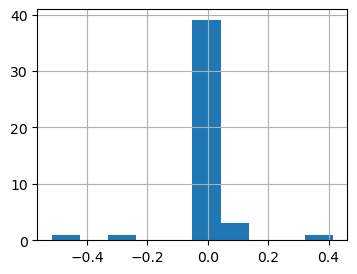

In [174]:
plt.figure(figsize = (4, 3))
df_corr_with_targ['corr_with_target'].hist()

#### Fillna

In [175]:
cat_vars = X_not_target.select_dtypes(include  = [object]).columns
num_vars = X_not_target.select_dtypes(include = [np.number]).columns

X_not_target[cat_vars] = X_not_target[cat_vars].fillna('_miss',axis = 1)
X_not_target[num_vars] = X_not_target[num_vars].fillna(0, axis = 1)

In [177]:
model_features = ['MSP_TYPE_micro',
 'MSP_IN_DATE_dist',
 'STATEDCAPITAL',
 'MSP_TYPE_middle',
 'AGE',
 'OPF_ограниченной',
 'OPF_непубличные',
 'OKVED_CHAPTER_CODE_C',
 'OKVED_CLASS_CODE_68',
 'PRIVACY_FORM_частная',
 'REGION_TYPE_область',
 'OKVED_CHAPTER_CODE_M',
 'OKVED_CHAPTER_CODE_A',
 'OKVED_CHAPTER_CODE_F',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'PRIVACY_FORM_иностранных',
 'OKVED_CHAPTER_CODE_D',
 'OKVED_CHAPTER_CODE_B',
 'INDUSTRY_GROUP_оптовая',
 'OKVED_CLASS_CODE_41',
 'OKVED_CHAPTER_CODE_S',
 'OKVED_CHAPTER_CODE_H',
 'REGION_TYPE_республика',
 'OKVED_CHAPTER_CODE_I',
 'REORGANIZING_True',
 'PRIVACY_FORM_собственность',
 'OKVED_CHAPTER_CODE_G',
 'STATUS_егрюл',
 'OKVED_CHAPTER_CODE_K',
 'REGION_CODE_50',
 'OKVED_CHAPTER_CODE_R',
 'STATUS_08',
 'OKVED_CHAPTER_CODE_E']

print(len(model_features))

34


In [178]:
# X_not_target = X_not_target[features_corr_BE_L1]
X_not_target = X_not_target[model_features]

print(X_not_target.shape)

# X_train, X_test, y_train, y_test = train_test_split(X_not_target, y, test_size = 0.20, random_state = 42, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_not_target, y, test_size = 0.15, random_state = 42, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.mean(), y_test.mean())

KeyError: "['OPF_ограниченной', 'OPF_непубличные', 'OKVED_CLASS_CODE_68', 'PRIVACY_FORM_частная', 'OKVED_CLASS_CODE_43', 'OKVED_CLASS_CODE_47', 'PRIVACY_FORM_иностранных', 'OKVED_CLASS_CODE_41', 'PRIVACY_FORM_собственность', 'STATUS_егрюл', 'REGION_CODE_50', 'STATUS_08'] not in index"

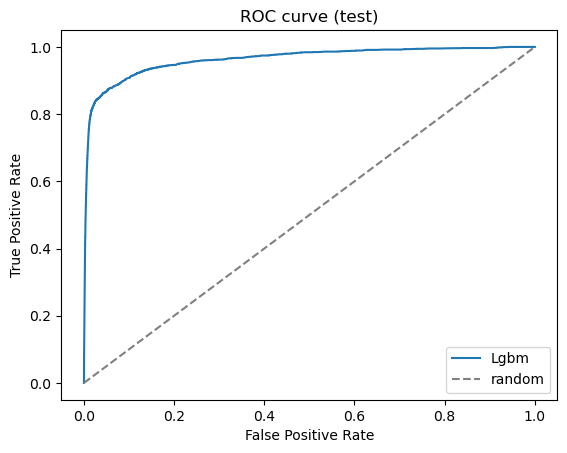

In [106]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# %pylab inline

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)

pylab.plot(fpr, tpr, label = 'Lgbm')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve (test)')
pylab.legend(loc = "lower right")

In [116]:
# from sklearn import model_selection, datasets, linear_model, metrics

kfold = model_selection.KFold(n_splits = 4)

# AUC_cv = cross_val_score(clf_lgb, X_not_target[features_corr_BE_L1], y, cv = kfold, scoring = 'roc_auc', n_jobs = -1)
AUC_cv = cross_val_score(clf_lgb, X_not_target[selected_features_BE_all], y, cv = kfold, scoring = 'roc_auc', n_jobs = -1)
AUC_cv

# array([0.96199176, 0.96320497, 0.96275306, 0.96419764])

array([0.96210482, 0.96223266, 0.962189  , 0.96432751])

[LightGBM] [Info] Number of positive: 10757, number of negative: 609314
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 620071, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017348 -> initscore=-4.036777
[LightGBM] [Info] Start training from score -4.036777
[LightGBM] [Info] Number of positive: 10657, number of negative: 609414
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 620071, number of used features: 34
[LightGBM]

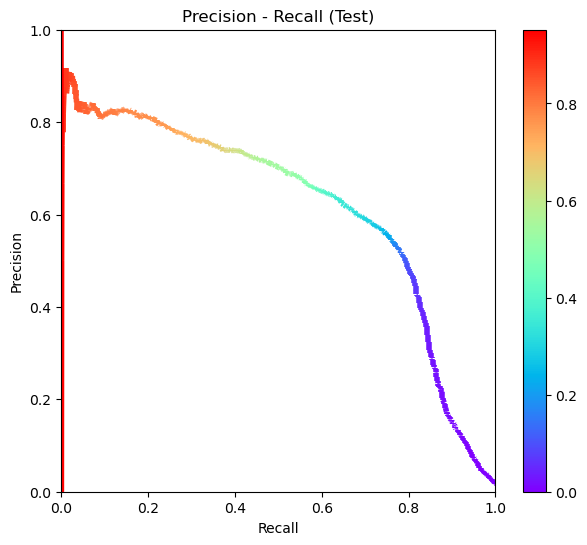

In [108]:
# Precision recall curve
# from sklearn.metrics import precision_recall_curve

precision1, recall1, threshold1 = precision_recall_curve( y_test, y_pred_test )

from matplotlib.collections import LineCollection

x    = recall1
y_pr    = precision1
cols = threshold1

points = np.array([x, y_pr]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis = 1)

fig, ax = plt.subplots(figsize = (7, 6))
#lc = LineCollection(segments, cmap ='viridis')
lc = LineCollection(segments, cmap = plt.cm.rainbow)

lc.set_array(cols)
lc.set_linewidth(4)
line = ax.add_collection(lc)
fig.colorbar(line, ax = ax)

#plt.figure(figsize = [15,15])

plt.xlabel("Recall")
plt.ylabel("Precision")
pylab.title('Precision - Recall (Test)')
plt.show()

In [109]:
y_pred_train_class = clf_lgb.predict(X_train)
AUC_train_class = metrics.roc_auc_score(y_train, y_pred_train_class)

Gini_train_class = 2 * AUC_train_class - 1
print('AUC_train_class:', AUC_train_class)
print('Gini_train_class:', Gini_train_class)

print()

y_pred_test_class = clf_lgb.predict(X_test)
AUC_test_class = metrics.roc_auc_score(y_test, y_pred_test_class)
Gini_test_class = 2 * AUC_test_class - 1
print('AUC_test_class:', AUC_test_class)
print('Gini_test_class:', Gini_test_class)

AUC_train_class: 0.7798096617076927
Gini_train_class: 0.5596193234153855

AUC_test_class: 0.7731304702139784
Gini_test_class: 0.5462609404279568


In [110]:
print(len(X_not_target.columns))
X_not_target.columns

34


Index(['MSP_TYPE_micro', 'MSP_IN_DATE_dist', 'STATEDCAPITAL',
       'MSP_TYPE_middle', 'AGE', 'OPF_ограниченной', 'OPF_непубличные',
       'OKVED_CHAPTER_CODE_C', 'OKVED_CLASS_CODE_68', 'PRIVACY_FORM_частная',
       'REGION_TYPE_область', 'OKVED_CHAPTER_CODE_M', 'OKVED_CHAPTER_CODE_A',
       'OKVED_CHAPTER_CODE_F', 'OKVED_CLASS_CODE_43', 'OKVED_CLASS_CODE_47',
       'PRIVACY_FORM_иностранных', 'OKVED_CHAPTER_CODE_D',
       'OKVED_CHAPTER_CODE_B', 'INDUSTRY_GROUP_оптовая', 'OKVED_CLASS_CODE_41',
       'OKVED_CHAPTER_CODE_S', 'OKVED_CHAPTER_CODE_H',
       'REGION_TYPE_республика', 'OKVED_CHAPTER_CODE_I', 'REORGANIZING_True',
       'PRIVACY_FORM_собственность', 'OKVED_CHAPTER_CODE_G', 'STATUS_егрюл',
       'OKVED_CHAPTER_CODE_K', 'REGION_CODE_50', 'OKVED_CHAPTER_CODE_R',
       'STATUS_08', 'OKVED_CHAPTER_CODE_E'],
      dtype='object')

In [111]:
cm = metrics.confusion_matrix(y_test, y_pred_test_class)
print(cm)

TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print('TP:', TP)
print('FP:', FP)

[[121313    558]
 [   963   1181]]
TP: 1181
FP: 558


In [112]:
metrics.accuracy_score(y_test, y_pred_test_class)

0.9877353545942024

In [113]:
print(metrics.classification_report(y_test, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    121871
           1       0.68      0.55      0.61      2144

    accuracy                           0.99    124015
   macro avg       0.84      0.77      0.80    124015
weighted avg       0.99      0.99      0.99    124015



In [114]:
X_not_target.shape

(826761, 34)

In [115]:
y_pred_all = clf_lgb.predict_proba(X_not_target)[:,1]

p, r, thresholds = precision_recall_curve(y, y_pred_all)

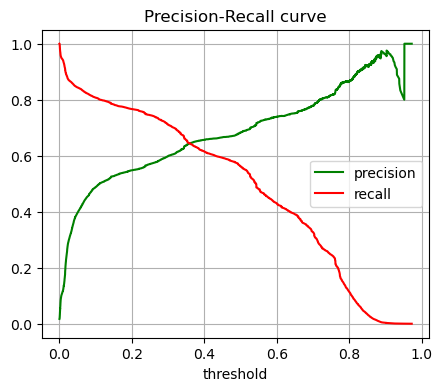

In [116]:
plt.figure(figsize = (5, 4))
plt.grid(True)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.legend(['precision','recall'])
plt.title('Precision-Recall curve')

plt.xlabel("threshold")
plt.show()

In [117]:
len(y_pred_all)

826761

In [118]:
y_pred_all_df = pd.DataFrame(y_pred_all)
y_pred_all_df.rename(columns = {0: 'predict'}, inplace = True)
y_pred_all_df.head()

,predict
0,0.832180
1,0.000823
2,0.009037
3,0.000040
4,0.000734


In [119]:
def dependency_volume_threshold(y_pred_all):

    list_thresholds, list_number = [], []
    
    # for th_i in range(0, 10):
    for th_i in range(1, 10):

        th_i = th_i / 10

        y_pred_all_01_i = y_pred_all['predict'].apply(lambda x: 1 if x >= th_i else 0)
        
        confusion_i = metrics.confusion_matrix(y, y_pred_all_01_i)

        TP_i, FP_i, TN_i, FN_i = confusion_i[1,1], confusion_i[0,1], confusion_i[0,0], confusion_i[1,0]
        number_i = TP_i + FP_i
        list_thresholds.append(th_i)
        list_number.append(number_i)

    d = {'thresholds': list_thresholds, 'number': list_number}
    df_th_num = pd.DataFrame(d)

    return df_th_num
        
df_th_num = dependency_volume_threshold(y_pred_all_df)
df_th_num

,thresholds,number
0,0.1,23618
1,0.2,19994
2,0.3,16977
3,0.4,13386
4,0.5,11762
5,0.6,8304
6,0.7,6002
7,0.8,1875
8,0.9,50


In [120]:
y.sum()

14292

Text(0.5, 0, 'threshold')

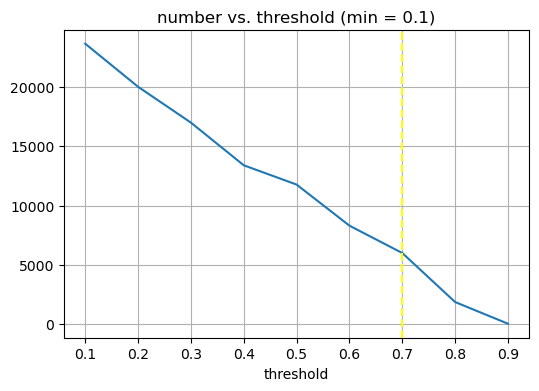

In [121]:
# df_th_num.plot()

plt.figure(figsize = (6, 4))

plt.plot(df_th_num['thresholds'], df_th_num['number'])
plt.axvline(x = 0.7, color = 'yellow', linestyle = '--')

plt.grid()
plt.title('number vs. threshold (min = 0.1)')
plt.xlabel("threshold")

Text(0.5, 0, 'threshold')

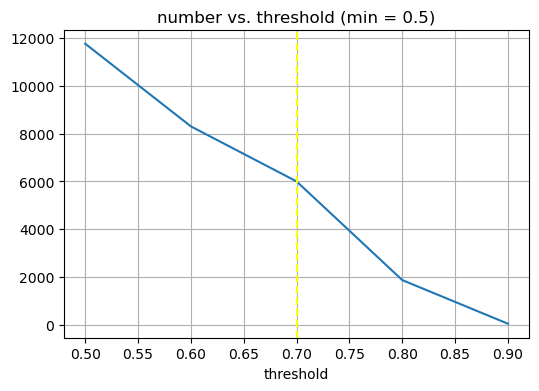

In [122]:
plt.figure(figsize = (6, 4))

plt.plot(df_th_num[df_th_num['thresholds'] >= 0.5]['thresholds'], 
         df_th_num[df_th_num['thresholds'] >= 0.5]['number'])

plt.axvline(x = 0.7, color = 'yellow', linestyle = '--')

plt.grid()
plt.title('number vs. threshold (min = 0.5)')
plt.xlabel("threshold")

In [123]:
y_pred_all = pd.DataFrame(y_pred_all).rename(columns = {0: 'predict'})

y_pred_all_01 = y_pred_all['predict'].apply(lambda x: 1 if x >= 0.5 else 0)
# y_pred_all_01

In [124]:
confusion = metrics.confusion_matrix(y, y_pred_all_01)
confusion

array([[808742,   3727],
       [  6257,   8035]])

In [125]:
len(y)

826761

In [126]:
# (1718 + 343) / 918738

In [127]:
# TP, FP, TN, FN = confusion[1,1], confusion[0,1], confusion[0,0], confusion[1,0]

In [128]:
# Precision:
# TP / TP + FP

Precision = confusion[1,1]/(confusion[0,1] + confusion[1,1])
Precision

0.6831321203876892

In [129]:
# Recall:
# TP / TP + FN

Recall = confusion[1,1]/(confusion[1,0] + confusion[1,1])
Recall

0.5622026308424294

In [130]:
F = 2 * Precision * Recall / (Precision + Recall)
F

0.6167958854686421

In [110]:
# import pickle

# **************** save model 12.05: *****************

# with open('model_LA_galaxy_targ2024_v2.pkl', 'wb') as fid:

#         pickle.dump(clf_lgb, fid)

# ********************* read: ************************

with open('model_LA_galaxy_targ2024_v2.pkl', 'rb') as fid:
    
    clf_lgb = pickle.load(fid)

In [111]:
clf_lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [112]:
clf_lgb.feature_importances_

array([ 95, 350, 646,  80, 844,  24,  20,  28, 118,  21,  99,  46,  12,
        24,  22,  50,  32,  18,  22,  47,  33,  32,  26,  62,  23,  21,
        36,  53,  32,  28,  20,  25,   0,  11], dtype=int32)

In [113]:
len(selected_features_BE_all)

34

In [114]:
X_not_target.shape

(826761, 34)

Text(0.5, 0, 'feature_importance')

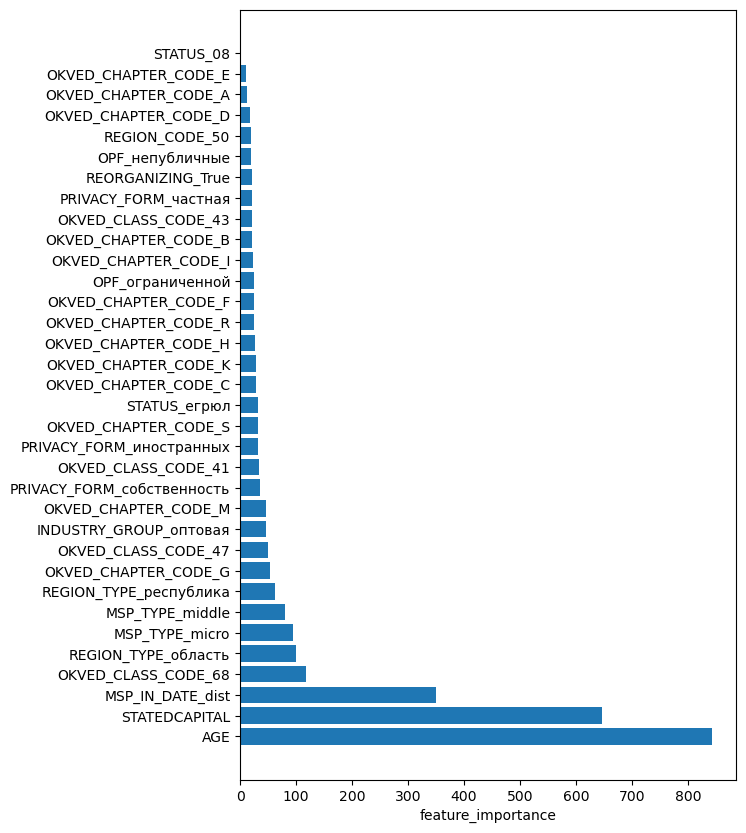

In [115]:
importances = clf_lgb.feature_importances_

# indices = np.argsort(importances)
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots()

ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))

_ = ax.set_yticklabels(np.array(X_not_target.columns)[indices])

fig.set_figheight(10)
plt.xlabel("feature_importance")

In [137]:
df['PRIVACY_FORM'].value_counts()

Частная собственность                                                                                                   926067
Собственность иностранных граждан и лиц без гражданства                                                                  12049
Совместная частная и иностранная собственность                                                                            6297
Собственность иностранных юридических лиц                                                                                 3406
Муниципальная собственность                                                                                               1058
Иная смешанная российская собственность                                                                                    924
Смешанная российская собственность с долей федеральной собственности                                                       660
Собственность субъектов Российской Федерации                                                                   

In [138]:
print(len(X_not_target))
X_not_target.columns

826761


Index(['MSP_TYPE_micro', 'MSP_IN_DATE_dist', 'STATEDCAPITAL',
       'MSP_TYPE_middle', 'AGE', 'OPF_ограниченной', 'OPF_непубличные',
       'OKVED_CHAPTER_CODE_C', 'OKVED_CLASS_CODE_68', 'PRIVACY_FORM_частная',
       'REGION_TYPE_область', 'OKVED_CHAPTER_CODE_M', 'OKVED_CHAPTER_CODE_A',
       'OKVED_CHAPTER_CODE_F', 'OKVED_CLASS_CODE_43', 'OKVED_CLASS_CODE_47',
       'PRIVACY_FORM_иностранных', 'OKVED_CHAPTER_CODE_D',
       'OKVED_CHAPTER_CODE_B', 'INDUSTRY_GROUP_оптовая', 'OKVED_CLASS_CODE_41',
       'OKVED_CHAPTER_CODE_S', 'OKVED_CHAPTER_CODE_H',
       'REGION_TYPE_республика', 'OKVED_CHAPTER_CODE_I', 'REORGANIZING_True',
       'PRIVACY_FORM_собственность', 'OKVED_CHAPTER_CODE_G', 'STATUS_егрюл',
       'OKVED_CHAPTER_CODE_K', 'REGION_CODE_50', 'OKVED_CHAPTER_CODE_R',
       'STATUS_08', 'OKVED_CHAPTER_CODE_E'],
      dtype='object')

In [139]:
feature_columns = list(X_not_target.columns)

In [140]:
variable_importance = pd.DataFrame(sorted(zip(clf_lgb.feature_importances_, feature_columns), reverse=True))
variable_importance.columns = ['gain', 'feature']

variable_importance['gain_share'] = variable_importance['gain'] / variable_importance['gain'].sum()

variable_importance = variable_importance[['feature', 'gain', 'gain_share']]

variable_importance

,feature,gain,gain_share
0,AGE,844,0.281333
1,STATEDCAPITAL,646,0.215333
2,MSP_IN_DATE_dist,350,0.116667
3,OKVED_CLASS_CODE_68,118,0.039333
4,REGION_TYPE_область,99,0.033000
5,MSP_TYPE_micro,95,0.031667
6,MSP_TYPE_middle,80,0.026667
7,REGION_TYPE_республика,62,0.020667
8,OKVED_CHAPTER_CODE_G,53,0.017667
9,OKVED_CLASS_CODE_47,50,0.016667


#### SHAP values

In [141]:
# pip install --upgrade shap

/home/ezagaynaya/.local/lib/python3.10/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


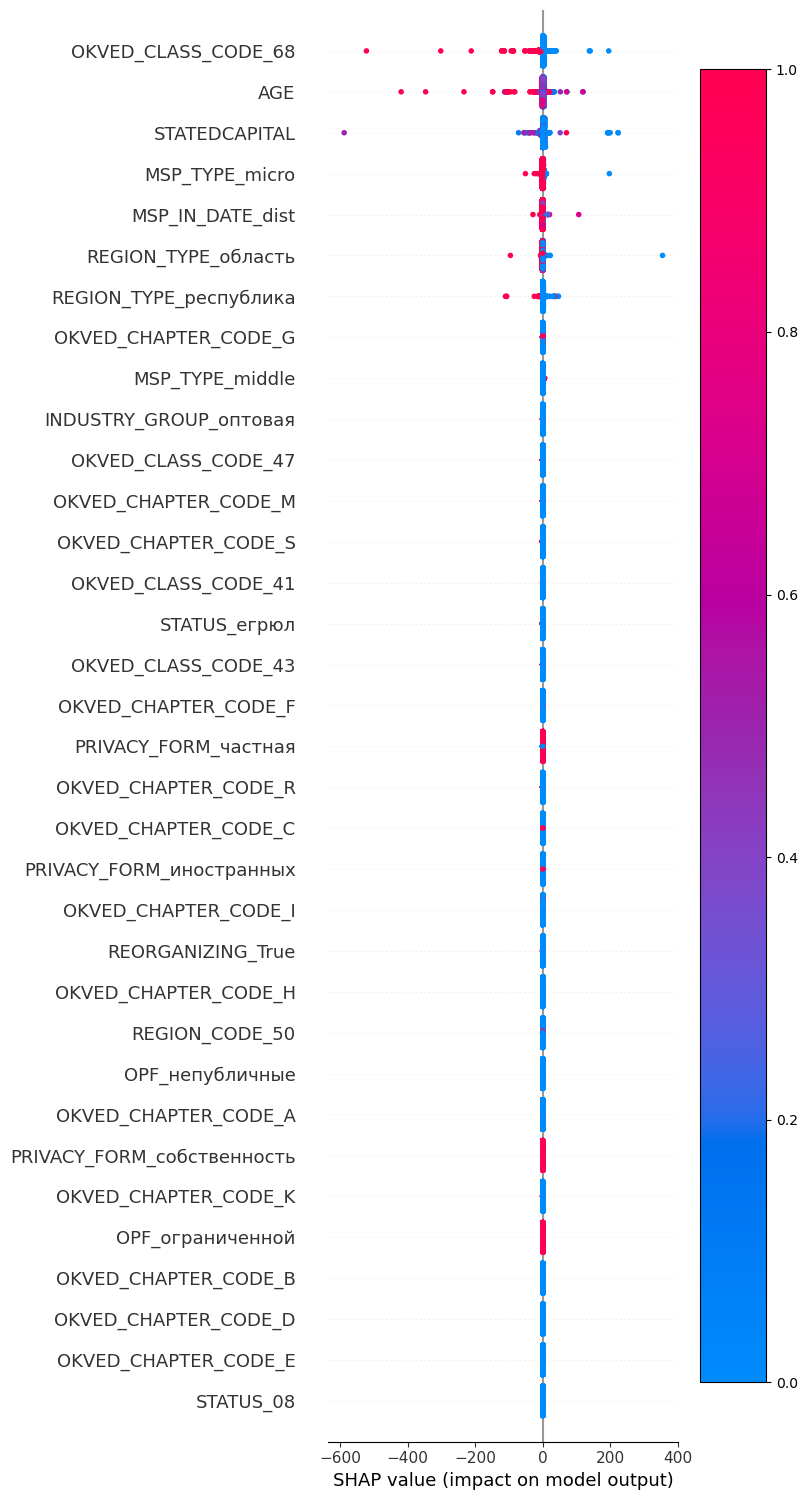

In [142]:
# Generate SHAP summary plots

import shap
from matplotlib.cm import ScalarMappable

feature_columns = X_not_target.columns

def generate_output_summary_plot(model_object, x_train, features, sample_size = 10**4):
    
    x_train = x_train.sample(sample_size)[features]
    
    explainer = shap.TreeExplainer(model_object)
    # shap_values = explainer.shap_values(x_train)[1]
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, max_display = 50, show=False, color_bar=False)
    
    plt.colorbar()
    plt.show()
    

generate_output_summary_plot(clf_lgb, X_not_target, feature_columns, sample_size = 10**4)

In [143]:
# Validation sample:

# X_y_test_last = pd.read_pickle('X_y_test_last_LA_2024_v3.pkl')
# print(X_y_test_last.shape)
# X_y_test_last.head(2)

In [144]:
# # ********************* read transformer: ********************
# with open('TF_IDF_vectorizer_v3.pkl', 'rb') as fid:
#     vectorizer = pickle.load(fid)

In [145]:
all_features = ['OPF',
 'REGION_CODE',
 'STATUS',
 'PRIVACY_FORM',
 'OKVED_CLASS_CODE',
 'INDUSTRY_GROUP']

for i in range(len(all_features)):

    feature = all_features[i]
    texts = X_y_test_last[feature].fillna('-1')

    tfidf_matrix = vectorizer.transform(texts)
    
    # Convert to DataFrame:
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    tfidf_df.columns = [feature + '_' + col for col in tfidf_df.columns ]

    X_y_test_last.drop(feature, axis = 1, inplace = True)
    X_y_test_last = pd.concat([X_y_test_last, tfidf_df], axis = 1)

print(X_y_test_last.shape)
X_y_test_last.head(3)

(91863, 69)


,AGE,STATEDCAPITAL,MSP_IN_DATE_dist,MSP_OUT_DATE_dist,STATUS_DATE_dist,REGION_TYPE_автономная область,REGION_TYPE_автономный округ,REGION_TYPE_город,REGION_TYPE_край,REGION_TYPE_область,...,OKVED_CLASS_CODE_деятельность,OKVED_CLASS_CODE_оптовая,OKVED_CLASS_CODE_производство,OKVED_CLASS_CODE_строительство,OKVED_CLASS_CODE_торговля,INDUSTRY_GROUP_деятельность,INDUSTRY_GROUP_оптовая,INDUSTRY_GROUP_производство,INDUSTRY_GROUP_строительство,INDUSTRY_GROUP_торговля
0,9.4,20000.0,105.0,NaN,NaN,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,5.2,10000.0,63.0,NaN,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000
2,2.1,600000.0,25.0,NaN,NaN,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107


In [146]:
69 - 45

24

In [147]:
# X_y_test_last['index']

In [148]:
# X.drop(feature, axis = 1, inplace = True)
# tfidf_df.reset_index(inplace = True, drop = True)
# # print(X.shape)
# X = pd.concat([X, tfidf_df], axis = 1)
# # print(X.shape)

In [149]:
cat_vars = X_y_test_last.select_dtypes(include  = [object]).columns
num_vars = X_y_test_last.select_dtypes(include = [np.number]).columns

X_y_test_last[cat_vars] = X_y_test_last[cat_vars].fillna('_miss',axis = 1)
X_y_test_last[num_vars] = X_y_test_last[num_vars].fillna(0, axis = 1)

In [150]:
X_y_test_last['REVENUE'].head(2)

0    0.0
1    0.0
Name: REVENUE, dtype: float64

In [151]:
print(len(set(selected_features_BE_all) - set(X_y_test_last.columns)))
set(selected_features_BE_all) - set(X_y_test_last.columns)

12


{'OKVED_CLASS_CODE_41',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'OKVED_CLASS_CODE_68',
 'OPF_непубличные',
 'OPF_ограниченной',
 'PRIVACY_FORM_иностранных',
 'PRIVACY_FORM_собственность',
 'PRIVACY_FORM_частная',
 'REGION_CODE_50',
 'STATUS_08',
 'STATUS_егрюл'}

In [152]:
X_y_test_last.shape

(91863, 69)

In [153]:
# fill 0:
list_0_cols = list(set(selected_features_BE_all) - set(X_y_test_last.columns) )
for i in list_0_cols:
    X_y_test_last[i] = 0

print(X_y_test_last.shape)
X_y_test_last.head(3)

(91863, 81)


,AGE,STATEDCAPITAL,MSP_IN_DATE_dist,MSP_OUT_DATE_dist,STATUS_DATE_dist,REGION_TYPE_автономная область,REGION_TYPE_автономный округ,REGION_TYPE_город,REGION_TYPE_край,REGION_TYPE_область,...,OPF_ограниченной,STATUS_08,OKVED_CLASS_CODE_47,PRIVACY_FORM_частная,PRIVACY_FORM_иностранных,REGION_CODE_50,OPF_непубличные,OKVED_CLASS_CODE_43,OKVED_CLASS_CODE_68,PRIVACY_FORM_собственность
0,9.4,20000.0,105.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.2,10000.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.1,600000.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
X_valid = X_y_test_last.drop('REVENUE', axis = 1)[selected_features_BE_all]
y_valid = X_y_test_last['REVENUE']

print(X_valid.shape)
print(y_valid.shape)

(91863, 34)
(91863,)


In [155]:
y_pred_valid = clf_lgb.predict_proba(X_valid)[:,1]
AUC_valid = metrics.roc_auc_score(y_valid, y_pred_valid)

Gini_valid = 2 * AUC_valid - 1
print('AUC_valid:', AUC_valid)
print('Gini_valid:', Gini_valid)

AUC_valid: 0.9566436448383647
Gini_valid: 0.9132872896767295


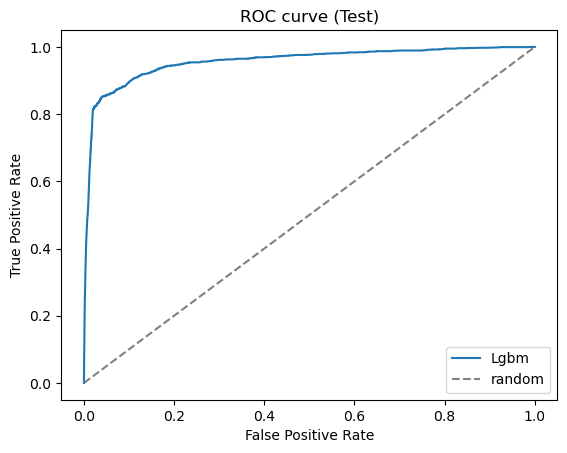

In [156]:
fpr, tpr, _ = metrics.roc_curve(y_valid, y_pred_valid)

pylab.plot(fpr, tpr, label = 'Lgbm')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve (Test)')
pylab.legend(loc = "lower right")

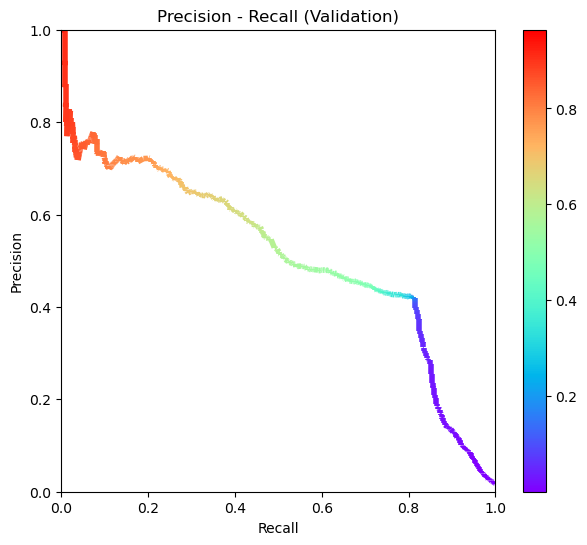

In [157]:
# Precision recall curve
# from sklearn.metrics import precision_recall_curve

precision1, recall1, threshold1 = precision_recall_curve( y_valid, y_pred_valid )

from matplotlib.collections import LineCollection

x    = recall1
y_pr    = precision1
cols = threshold1

points = np.array([x, y_pr]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis = 1)

fig, ax = plt.subplots(figsize = (7, 6))
#lc = LineCollection(segments, cmap ='viridis')
lc = LineCollection(segments, cmap = plt.cm.rainbow)

lc.set_array(cols)
lc.set_linewidth(4)
line = ax.add_collection(lc)
fig.colorbar(line, ax = ax)

#plt.figure(figsize = [15,15])

plt.xlabel("Recall")
plt.ylabel("Precision")
pylab.title('Precision - Recall (Validation)')
plt.show()

In [158]:
y_pred_valid_class = clf_lgb.predict(X_valid)

cm = metrics.confusion_matrix(y_valid, y_pred_valid_class)
print(cm)

TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print('TP:', TP)
print('FP:', FP)

[[88977  1298]
 [  508  1080]]
TP: 1080
FP: 1298


In [159]:
y_pred_valid_ = clf_lgb.predict_proba(X_valid)[:,1]

p, r, thresholds = precision_recall_curve(y_valid, y_pred_valid_)

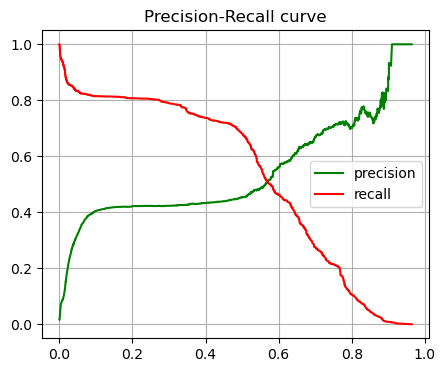

In [160]:
plt.figure(figsize = (5, 4))
plt.grid(True)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.legend(['precision','recall'])
plt.title('Precision-Recall curve')
plt.show()

In [161]:
y_pred_valid_ = pd.DataFrame(y_pred_valid_).rename(columns = {0: 'predict'})

y_pred_all_01_ = y_pred_valid_['predict'].apply(lambda x: 1 if x >= 0.8 else 0)
# y_pred_all_01

In [162]:
confusion = metrics.confusion_matrix(y_valid, y_pred_all_01_)
confusion

array([[90203,    72],
       [ 1418,   170]])

In [163]:
Precision = confusion[1,1]/(confusion[0,1] + confusion[1,1])
Precision

0.7024793388429752

[LightGBM] [Info] Number of positive: 10812, number of negative: 609259
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 620071, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017437 -> initscore=-4.031587
[LightGBM] [Info] Start training from score -4.031587
[LightGBM] [Info] Number of positive: 10757, number of negative: 609314
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 620071, number of used features: 34
[LightGBM]